In [29]:
import pickle
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from statsmodels.graphics import tsaplots
from uszipcode import ZipcodeSearchEngine
import statsmodels.api as sm
import pylab


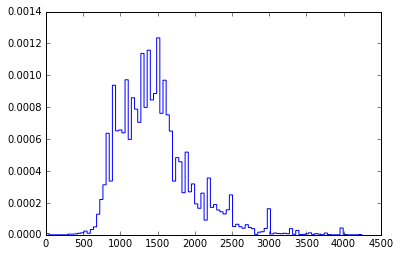

In [19]:
data = pd.read_csv("cleaned_data_final.csv")
# plot prices to see what the distribution looks like
_ = plt.hist(data['price'], bins = 100, normed=True, histtype = 'step')
plt.show()

## Plot Pct Craigslist Listings Per Population To See If It's Normal Distribution

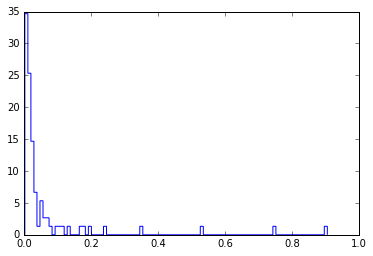

In [51]:
# plot count of craigslist beds per zipcodee
craigslist_over_total = munged['craigslist pct per total units']
craigslist_over_total = craigslist_over_total.drop(10) 
_ = plt.hist(craigslist_over_total, bins = 100, normed=True, histtype = 'step')
plt.show()

In [69]:
pct_crgslist_zip = munged[['craigslist pct per total units', 'zipcodes', 'total units']].drop(10)
pct_crgslist_zip_sort = pct_crgslist_zip.sort_values(by = 'craigslist pct per total units', ascending = False )
top_five = pct_crgslist_zip_sort[:5]
top_five

,craigslist pct per total units,zipcodes,total units
40,0.906166,55402,373.0
83,0.750000,55455,4.0
13,0.527329,55114,1610.0
39,0.347516,55401,4912.0
52,0.242475,55414,10797.0


The distribution of percent of craigslist units advertised per total population in each zipcode is skewed right, suggesting that there are a few zipcodes where craigslist ads tend to be located more. The three zipcodes with the highest pct of craigslist listings per zipcode have very low total units. The 4th largest comes from the downtown area of Minneapolis, where a high number of new developments are taking place, and the 5th largest comes from the are of Minneapolis where University of Minnesota-Twin Cities, and therefore a large percentage of student housing is located. The distribution was plotted To see what it looks like without these high points that skew it right. As can be seen below, the distribution is still skewed right. 

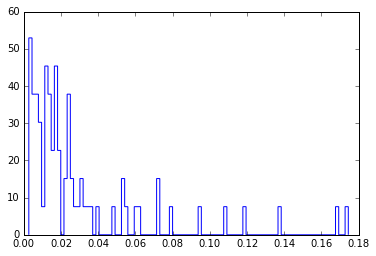

In [73]:
pct_craigslist_zip_sort_no_outliers = pct_crgslist_zip.sort_values(by = 'craigslist pct per total units', ascending = False )[6:]

# plot count of craigslist beds per zipcode without outliers
craigslist_over_total = pct_craigslist_zip_sort_no_outliers['craigslist pct per total units']

_ = plt.hist(craigslist_over_total, bins = 100, normed=True, histtype = 'step')
plt.show()

## Investigating Unknown Beds Values or Bed Values 1 Using Clustering Along Price Value

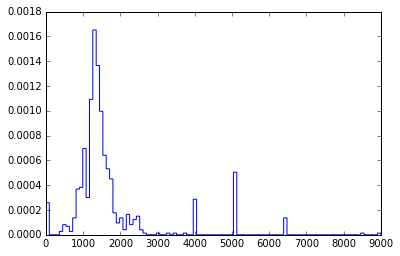

In [17]:
# import pickle file containing bed values that were unassigned
unassigned_beds = pd.read_pickle('unassigned_beds.pickle', compression = "infer")
# limit to price column
unassigned_beds['price'] = unassigned_beds['price'].astype(float)
# drop clear outliers from unassigned beds
unassigned_beds = unassigned_beds.loc[unassigned_beds['price'] < 10000] 
unassigned_beds = unassigned_beds['price']
# visualize distribution of unassigned beds to look for patterns
_ = plt.hist(unassigned_beds, bins = 100, normed=True, histtype = 'step')
plt.show()

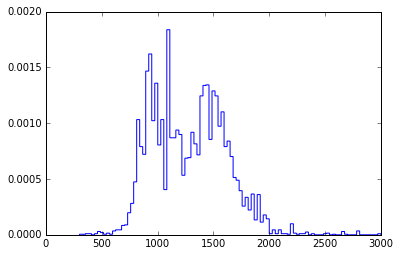

In [38]:
# subset beds that were assigned one to take a closer look
one_bed = over_fmr.loc[over_fmr['beds_baths'] == "1"]
#plot_df = updated_df_clean.loc[updated_df_clean['no match'] == True]
#print (len(plot_df))
_ = plt.hist(one_bed['price'], bins = 100, normed=True, histtype = 'step')
plt.show()

In [21]:
# import dataframe containing column on properties over fair market rent
over_fmr = pd.read_csv("over_fmr_dataframe.csv")

## Two Sample Proportions Z-test To Test Whether St. Paul Is More Affordable Than Minneapolis

Alpha = .05

Null Hypothesis: There is not difference between the proportion of craigslist rentals in Minneapolis one standard deviaton over FMR and the proportion of craigslist rentals in St. Paul one standard deviation over FMR

Alternative Hypothesis: The proportion of craigslist rentals in Minneapolis one standard deviaton over FMR is greater than the proportion of craigslist rentals in St. Paul one standard deviation over FMR

In [158]:
# subset st paul and minneapolis ads that are one standard deviation over the fair market rent
st_paul_over_fmr = over_fmr.loc[(over_fmr['City'] == "SAINT PAUL") & (over_fmr['over fmr1'] == 1)]
minneapolis_over_fmr = over_fmr.loc[(over_fmr["City"] == "MINNEAPOLIS") & (over_fmr['over fmr1'] == 1)]

In [159]:
# subset total listings within St Paul and Minneapolis
st_paul_sample = len(over_fmr.loc[over_fmr['City'] == "SAINT PAUL"])
minneapolis_sample = len(over_fmr.loc[over_fmr['City'] == "MINNEAPOLIS"])

In [160]:
# get total amount of listings in St. Paul and Minneapolis over fmr
st_paul_true = len(st_paul_over_fmr)
minneapolis_true = len(minneapolis_over_fmr)
print (st_paul_sample, minneapolis_sample, st_paul_true, minneapolis_true)

2305 7165 1213 4219


In [161]:
# create numpy array of rentals one standard deviation over fair market rent for respective cities
count = np.array([int(minneapolis_true), int(st_paul_true)])
# create a numpy array of total number of rentals in saint paul and minneapolis
nobs = np.array([int(minneapolis_sample), int(st_paul_sample)])
# run proportions z test assuming null hypothesis is true, hence "larger" as argument for alternative
# that minneapolis has a greater proportion of over fair market rent 
z, p = proportions_ztest(count, nobs, alternative = 'larger' )
print ("p value = ", p)

p value =  6.28653043154e-08


The p-value is below the alpha lebel, so the alternative hypothesis is accepted

## Two Sample T-test of Means to Test If There Is A Difference in Affordability Between Zipodes Below And Above Median Wealth Rating

Alpha = .05

Null Hypothesis: There is no difference between the means of Zipcodes Above Median Wealth and

In [33]:
# read in the munged data
munged = pd.read_csv('craigslist_munged1.csv')
munged
# subset munged data into above median income and under median income
above_med = munged.loc[munged['above median'] == True]
under_med = munged.loc[munged['above median'] == False]

would be interesting to see how much more people are paying for the amount of money that they make

In [19]:
# calculat mean and standard deviation for craigslist pct over fmr field
# for each subset
above_med_std = np.std(above_med['craigslist pct over fmr'])
under_med_std = np.std(under_med['craigslist pct over fmr'])
above_med_mu = np.std(above_med['craigslist pct over fmr'])
under_med_mu = np.std(under_med['craigslist pct over fmr'])


In [21]:
# run two sample means t-test 
t, p = stats.ttest_ind(above_med['craigslist pct over fmr'], under_med['craigslist pct over fmr'])
p

0.87064156278393545

## Whitney Test With the Same Data

In [34]:
s, p = stats.mannwhitneyu(above_med['craigslist pct over fmr'], under_med['craigslist pct over fmr'], alternative = "two-sided")
p

0.40172131399245292

## Two Sample T-test of Means to Test If There Is A Difference in Affordability Between St. Paul and Minneapolis and their surrounding suburbs




In [140]:
df_vals_over_fmr = pd.read_csv('over_fmr_dataframe.csv')


In [141]:
# copy dataframe as df_vals_over_fmr will be modified
final_cities = df_vals_over_fmr
#convert studio to one in order to sum number of craigslist units per city code
df_vals_over_fmr.loc[df_vals_over_fmr['beds_baths'] == "studio", "beds_baths"] = "1"
# convert beds_baths to float
df_vals_over_fmr['beds_baths'] = df_vals_over_fmr['beds_baths'].astype(float)
# sum number of beds baths in cities
beds_per_city_craigslist = df_vals_over_fmr.groupby('City')['beds_baths'].sum()
# reset index of dataframe and rename columns
beds_per_city_craigslist = beds_per_city_craigslist.reset_index()
beds_per_city_craigslist = beds_per_city_craigslist.rename(columns={'beds_baths': 'craigslist beds per cities'})
# join City and County columns
# first take subset of dataframe with just counties, cities and cities
counties_cities = final_cities[['zipcodes', 'County', 'City']]
# drop duplicate rows
counties_cities = counties_cities.drop_duplicates()
# merge counties and cities columns with craigslist per city sum column
beds_per_city_craigslist = counties_cities.merge(beds_per_city_craigslist, how='inner', on="City")
beds_per_city_craigslist = beds_per_city_craigslist.drop_duplicates(['City'])

In [142]:
# function to perform operations on dataframes 
# for 1,2,3 standard deviations over fmr
def munge_over_fmr(dfs, df_beds_sum):
    dataframes = []
    for dataframe in dfs:
        # sum the number of units over fmr
        over_fmr_sum = dataframe.groupby('City')['beds_baths'].sum()
        # reindex dataframe
        over_fmr_craigslist = over_fmr_sum.reset_index()
        over_fmr_craigslist = over_fmr_craigslist.rename(columns={'beds_baths': 'craigslist beds per cities over fmr'})
        # merge dataframe sums of craigslist per citiescode and sums of overfmr listings per citiescode
        merged = pd.concat(objs = [df_beds_sum.set_index('City'), over_fmr_craigslist.set_index('City')], axis = 1)
        # create citiescodes column
        merged['City'] = merged.index
        # reindex dataframe
        index_list = list(range(len(merged.index)))
        # make index series a column in dataframe
        merged['index'] = index_list
        # set index column as index of dataframe
        merged = merged.set_index(['index'])
        # fill na
        merged = merged.fillna(0)
        # coerce columns
        merged['craigslist beds per cities'] = pd.to_numeric(merged['craigslist beds per cities'], errors = "coerce")
        merged['craigslist beds per cities over fmr'] = pd.to_numeric(merged['craigslist beds per cities over fmr'], errors = "coerce")
        # percent of craigslist listings x standard deviations over fmr 
        merged['craigslist pct over fmr'] = 0 
        # cast as float
        merged['craigslist pct over fmr'] = merged['craigslist pct over fmr'].astype(float)
        # percent of craigslist listings per craigslist total in cities code
        merged['craigslist pct over fmr'] = merged['craigslist beds per cities over fmr'].div(merged['craigslist beds per cities'])
        dataframes.append(merged)
    return dataframes

In [143]:
# sum of over fmr units per zipcode house of units
over_fmr_1 = df_vals_over_fmr.loc[df_vals_over_fmr['over fmr1'] == 1]
over_fmr_2 = df_vals_over_fmr.loc[df_vals_over_fmr['over fmr2'] == 1]
over_fmr_3 = df_vals_over_fmr.loc[df_vals_over_fmr['over fmr3'] == 1]
# create list of dataframes with over fmr rows
dfs = [over_fmr_1, over_fmr_2, over_fmr_3]
# munge dataframes 
munged1, munged2, munged3 = munge_over_fmr(dfs, beds_per_city_craigslist)
munged_list = [munged1, munged2, munged3]
# save munged dataframes to csvs
for df_munged in munged_list:
    count = 1
    df_munged.to_csv('craigslist_munged' + str(count) + '.csv')
    count += 1

In [164]:
# subset counties so as to analyze them separately 
# since we know that ramsey and hennepin affordabilities differ
ramsey_data = final_cities.loc[(final_cities['County'] == "Ramsey")]
hennepin_data = final_cities.loc[(final_cities['County'] == "Hennepin")]
# get st paul and minneapolis rows into separate dataframes
ramsey_st_paul = ramsey_data.loc[ramsey_data['City'] == "SAINT PAUL"]
hennepin_minne = hennepin_data.loc[hennepin_data['City'] == "MINNEAPOLIS"]
# get all cities that are not minneapolis or st paul in ramsey and hennepin into separate dataframes
# respectively
ram_no_st_paul = ramsey_data.loc[ramsey_data['City'] != "SAINT PAUL"]
hen_no_minne = hennepin_data.loc[hennepin_data['City'] != "MINNEAPOLIS"]

In [150]:
# write function to run t-test difference of means
# on both datasets
# run two sample means t-test 
def city_vs_suburb(suburbs_df, city_df):
    suburbs_total = len(suburbs_df)
    city_total = len(city_df)
    suburbs_overfmr = len(suburbs_df.loc[suburbs_df['over fmr1'] == 1])
    city_overfmr = len(city_df.loc[city_df['over fmr1'] == 1])
    # create numpy array of rentals one standard deviation over fair market rent for respective cities
    count = np.array([int(city_overfmr), int(suburbs_overfmr)])
    # create a numpy array of total number of rentals in saint paul and minneapolis
    nobs = np.array([int(city_total), int(suburbs_total)])
    # run proportions z test assuming null hypothesis is true, hence "larger" as argument for alternative
    # that minneapolis has a greater proportion of over fair market rent 
    z, p = proportions_ztest(count, nobs, alternative = 'larger' )
    return ("p value = ", p)


In [168]:
#def city_vs_suburb(suburbs_df, city_df):
suburbs_df = ram_no_st_paul
city_df = ramsey_st_paul
suburbs_total = len(suburbs_df)
city_total = len(city_df)
suburbs_overfmr = len(suburbs_df.loc[suburbs_df['over fmr1'] == 1])
city_overfmr = len(city_df.loc[city_df['over fmr1'] == 1])
#suburbs_overfmr = len(suburbs_overfmr)
#city_overfmr = len(city_overfmr)
# create numpy array of rentals one standard deviation over fair market rent for respective cities
count = np.array([int(city_overfmr), int(suburbs_overfmr)])
# create a numpy array of total number of rentals in saint paul and minneapolis
nobs = np.array([int(city_total), int(suburbs_total)])
# run proportions z test assuming null hypothesis is true, hence "larger" as argument for alternative
# that minneapolis has a greater proportion of over fair market rent 
z, p = proportions_ztest(count, nobs, alternative = 'larger' )
p

2.8231574654258761e-43

## Pearson Correlation Coefficient Between Price and Square Feet

Alpha Level = .05

Null Hypothesis: There is no significant relationship between the square feet and price variables

Alternative Hypothesis: There is a statistically significant relationship between the square feet and price variables

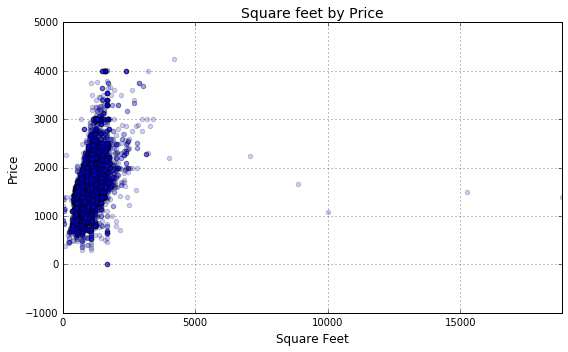

In [46]:
# generate a scatterplot for price vs square feet 
# and create lists as inputs
x = [a for a in over_fmr['square feet']]
y = list(over_fmr['price'])
# generate plot object
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
# set plot configurations
ax.set_xlim([0, max(x)])
ax.set_xlabel('Square Feet', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Square feet by Price', fontsize=14)
# set plot layout
ax.grid(True)
fig.tight_layout()
plt.show()

In [62]:
# run pearson r to obtain correlation coefficient between square ft and price
print ("dataset with no square feet values that were filled with the mean = length ", len(over_fmr_drop_null))
stats.pearsonr(over_fmr_drop_null['price'], over_fmr_drop_null['square feet'])

dataset with no square feet values that were filled with the mean = length  15111


(0.46994225203439949, 0.0)

In [63]:
# run pearson r to obtain correlation coefficient between square ft and price
print ("dataset with square feet values that were filled with the mean = length ", len(over_fmr))
stats.pearsonr(over_fmr['price'], over_fmr['square feet'])

dataset with square feet values that were filled with the mean = length  17111


(0.47122639914774045, 0.0)

As is indicated by the results Pearson Correlation Coefficient between Price and Square feet, at the .05 level of significance we can accept the alternative hypothesis that there is a relationship between the Price and Square Feet variables such that 47% of the variance of the Price residuals can be explained by the variance of the residuals of the Square Feet residuals

## Autocorrelation

In [72]:
# set datetime as index
time_df = over_fmr.set_index(['datetime'])
# create datetime object
time_df.index = pd.to_datetime(time_df.index)
# subset to only include price
time_df = time_df['price']

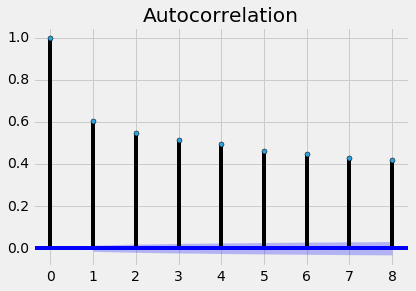

In [86]:
# use fivethirtyeight plot style
plt.style.use('fivethirtyeight')


# Display the autocorrelation of price over time
fig = tsaplots.plot_acf(time_df, lags=8)

# Show plot
plt.show()

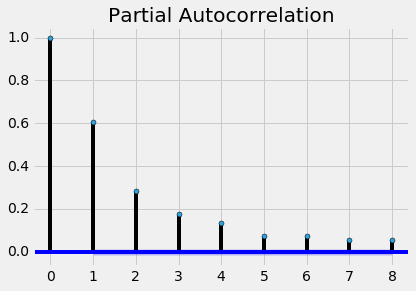

In [87]:
# Display partial autocorrelation of price over time
fig = tsaplots.plot_pacf(time_df, lags=8)

# Show plot
plt.show()

In [ ]:
# chi squared for cities? 
# affordability of St. Paul and Minneapolis vs. surrounding suburbs, chi squared test of difference?
# or 
# proximity to city center?

# calculate pearson r

# another thing to look at would be price per square ft per zip code, each zipcode gets a number 

# proportion of over fmr in zipcodes below average wealth and how they compare to proportions over fmr in zipcodes over average 
# wealth
 # - take the mean of the percentages 
    
# chi-squared test for association between two variables (could be zipcodes)